<a href="https://colab.research.google.com/github/bild12/EspIA/blob/main/reto_1_preparaci_n_de_datos_datos_de_siniestralidad_vial_en_bogot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Reto 1  Preparación de datos Datos de siniestralidad vial en Bogotá**
**Preparacion de Datos**

**Especialización en Inteligencia Artificial**

**Pontificia Universidad Javeriana**

GRUPO 2
---
Integrantes:

*  Jorge Manuel Diaz Guzman - jm.diaz@javeriana.edu.co
*  Bibiana Ivette Lopez Dominguez - lopezdbi@javeriana.edu.co
*  Edgar Sebasatian Fonseca Rodriguez - esebastian.fonsecar@javeriana.edu.co
*  Esteban David Perez Alvarez - ed.perez@javeriana.edu.co
*  Santiago Perez Siachoque - sperezs@javeriana.edu.co

## Descripción

La siniestralidad vial en las ciudades colombianas causa graves impactos a la salud pública (muertes, hospitalizaciones y discapacidad), a la economía por los costos que implica la atención de emergencias relacionadas a estos incidentes y en general graves perturbaciones al bienestar de la población. Es por esto que es útil analizar este fenómeno a la luz de los datos disponibles.

- Datos abiertos de la secretaría de movilidad de Bogotá
  - [x] Preparacion de datos.
    - [X] Identificacion de las fuentes.
    - [X] Extracción de datos.
    - [x] Tranformación de datos.
    - [x] Carga.

## Requerimientos

### Importar módulos

In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import io
import requests
from io import BytesIO
from shapely.geometry import Point

## Datos abiertos de la secretaría de movilidad de Bogotá

### Preparacion de Datos

#### Identificacion de las  fuentes

En esta primera fase, los datos se obtienen del repositorio Datos Abiertos de la Secretaría de Movilidad de Bogotá, disponible en el siguiente enlace: https://datos.movilidadbogota.gov.co/datasets/movilidadbogota::accidente-1/explore.

Este repositorio contiene una base de datos con registros detallados de los accidentes automovilísticos que han ocurrido en la ciudad de Bogotá. Para este ejercicio, vamos a extraer los datos directamente desde el siguiente endpoint en formato CSV: https://hub.arcgis.com/api/v3/datasets/ea243e7de8e846c8bd27e47c08771d66_2/downloads/data?format=csv&spatialRefId=4686&where=1=1.

Este archivo contiene la información necesaria para analizar los incidentes viales y su distribución en la ciudad.

#### Extración de los Datos

In [ ]:
# Descargar el archivo CSV desde el endpoint
url = 'https://hub.arcgis.com/api/v3/datasets/ea243e7de8e846c8bd27e47c08771d66_2/downloads/data?format=csv&spatialRefId=4686&where=1=1'
response = requests.get(url)
csv_data = response.content

In [ ]:
# Leer el archivo CSV en un DataFrame
dataframe = pd.read_csv(io.StringIO(csv_data.decode('utf-8')))

# Mostrar las primeras filas del DataFrame
print(dataframe.head())

           X         Y  OBJECTID  FORMULARIO  CODIGO_ACCIDENTE  \
0 -74.090924  4.693807         1  A000640275           4484660   
1 -74.119697  4.717638         2  A001515603          10583520   
2 -74.040677  4.669288         3    A1241594            449558   
3 -74.066101  4.737015         4  A001516620          10583513   
4 -74.087407  4.679568         5  A000035070            513150   

     FECHA_OCURRENCIA_ACC HORA_OCURRENCIA_ACC  ANO_OCURRENCIA_ACC  \
0  2017/06/12 05:00:00+00            05:30:00                2017   
1  2022/10/29 05:00:00+00            10:55:00                2022   
2  2012/12/15 05:00:00+00            20:30:00                2012   
3  2022/11/01 05:00:00+00            14:58:00                2022   
4  2014/10/26 05:00:00+00            21:25:00                2014   

  MES_OCURRENCIA_ACC DIA_OCURRENCIA_ACC                   DIRECCION  \
0              JUNIO              LUNES  AV AVENIDA BOYACA-CL 79 02   
1            OCTUBRE             SABADO      K

#### Tranformación de datos

##### Informacion sobre las Columnas

In [ ]:
# Obtener y mostrar los nombres de las columnas
nombres_columnas = dataframe.columns
print(nombres_columnas)

Index(['X', 'Y', 'OBJECTID', 'FORMULARIO', 'CODIGO_ACCIDENTE',
       'FECHA_OCURRENCIA_ACC', 'HORA_OCURRENCIA_ACC', 'ANO_OCURRENCIA_ACC',
       'MES_OCURRENCIA_ACC', 'DIA_OCURRENCIA_ACC', 'DIRECCION', 'GRAVEDAD',
       'CLASE_ACC', 'LOCALIDAD', 'MUNICIPIO', 'FECHA_HORA_ACC', 'LATITUD',
       'LONGITUD', 'CIV', 'PK_CALZADA'],
      dtype='object')


In [ ]:
# Tipo de datos de las columnas
tipos_columnas = dataframe.dtypes
print(tipos_columnas)

X                       float64
Y                       float64
OBJECTID                  int64
FORMULARIO               object
CODIGO_ACCIDENTE          int64
FECHA_OCURRENCIA_ACC     object
HORA_OCURRENCIA_ACC      object
ANO_OCURRENCIA_ACC        int64
MES_OCURRENCIA_ACC       object
DIA_OCURRENCIA_ACC       object
DIRECCION                object
GRAVEDAD                 object
CLASE_ACC                object
LOCALIDAD                object
MUNICIPIO                object
FECHA_HORA_ACC           object
LATITUD                 float64
LONGITUD                float64
CIV                     float64
PK_CALZADA              float64
dtype: object


**Posibles variables**
- Nominal:
    - No tienen un orden natural
    - Se utilizan para clasificar o etiquetar datos.
- Ordinales
    - Tienen un orden natural.
    - La distancia entre los valores no es necesariamente igual.
- Discreta
    - Toman valores enteros y específicos.
    - No pueden tener fracciones ni decimales.
- Continuas
    - Pueden tomar cualquier valor dentro de un rango.
    - Pueden incluir fracciones y decimales.<br>
    
**Tabla con la descripcion de las variables**

|Nombre de la variable  | Tipo de Dato|
|-----------------------|-------------|
X                       | Nominal
Y                       | Nominal
OBJECTID                | Ordinal
FORMULARIO              | Nominal
CODIGO_ACCIDENTE        | Nominal
FECHA_OCURRENCIA_ACC    | Discreta
HORA_OCURRENCIA_ACC     | Nominal
ANO_OCURRENCIA_ACC      | Discreta
MES_OCURRENCIA_ACC      | Ordinal
DIA_OCURRENCIA_ACC      | Ordinal
DIRECCION               | Nominal
GRAVEDAD                | Nominal
CLASE_ACC               | Nominal
LOCALIDAD               | Nominal
MUNICIPIO               | Nominal
FECHA_HORA_ACC          | Discreta
LATITUD                 | Continua
LONGITUD                | Continua
CIV                     | Discreta
PK_CALZADA              | Discreta


Se puede observar que algunas de las columnas del dataframe fueron leidas en formato int64, float64 y object. Sin embargo algunas de estas variables representan realmente códigos. para eso es necesario tranformalas en su respectivo tipo para que no genere problemas a la hora de tratar los datos

##### Transformación y mappeo

In [ ]:
dataframe['OBJECTID'] = dataframe['OBJECTID'].astype(object)
dataframe['CODIGO_ACCIDENTE'] = dataframe['CODIGO_ACCIDENTE'].astype(object)

# Convertir la columna de tipo object a tipo categórico
dataframe['FECHA_OCURRENCIA_ACC_CT'] = dataframe['FECHA_OCURRENCIA_ACC'].astype('category')
# Convertir las categorías a códigos numéricos
dataframe['FECHA_OCURRENCIA_ACC_DIS'] = dataframe['FECHA_OCURRENCIA_ACC_CT'].cat.codes

In [ ]:
dataframe['GRAVEDAD'] = dataframe['GRAVEDAD'].map({'SOLO DANOS': 0, 'CON HERIDOS': 1, 'CON MUERTOS': 2})

In [ ]:
# Filtrar los datos para siniestros con heridos o muertes
dataframe = dataframe[(dataframe['GRAVEDAD'] == 1) | (dataframe['GRAVEDAD'] == 2)]

# Convertir la columna FECHA_HORA_ACC a tipo datetime
dataframe['FECHA_HORA_ACC'] = pd.to_datetime(dataframe['FECHA_HORA_ACC'])

# Eliminar la hora, quedándose solo con la fecha
dataframe['FECHA'] = dataframe['FECHA_HORA_ACC'].dt.date

# Calcular la frecuencia diaria de accidentes
frecuencia_diaria = dataframe.groupby(dataframe['FECHA_HORA_ACC'].dt.date).size().reset_index(name='Frecuencia')

# Determinar los cuartiles de la distribución
cuartiles = np.percentile(frecuencia_diaria['Frecuencia'], [25, 50, 75])


In [ ]:
# Función para clasificar el nivel de accidentalidad
def clasificar_accidentalidad(frecuencia):
    if frecuencia <= cuartiles[0]:
        return 'bajo'
    elif frecuencia <= cuartiles[1]:
        return 'medio'
    elif frecuencia <= cuartiles[2]:
        return 'alto'
    else:
        return 'muy alto'

In [ ]:
# Aplicar la clasificación a la frecuencia diaria
frecuencia_diaria['NivelAccidentalidad'] = frecuencia_diaria['Frecuencia'].apply(clasificar_accidentalidad)

# Cambiar el formato de la fecha
frecuencia_diaria['FECHA_HORA_ACC'] = pd.to_datetime(frecuencia_diaria['FECHA_HORA_ACC']).dt.strftime('%d/%m/%Y')

# Eliminar la columna de la frecuencia
frecuencia_diaria = frecuencia_diaria.drop(columns=['Frecuencia'])

# Mostrar los primeros registros para verificar
print(frecuencia_diaria.head())

  FECHA_HORA_ACC NivelAccidentalidad
0     01/01/2007               medio
1     02/01/2007               medio
2     03/01/2007                alto
3     04/01/2007                bajo
4     05/01/2007               medio


##### Asimetria y Curtosis

Asimetria: Nos permite identificar si los datos se distribuyen de forma uniforme alrededor de un punto central.

Curtosis: Determina el grado de concentración que presenta los valores en la region central de la distribucion. Por medio del coeficiente de curtosi.

Asimetría: -0.1375142820876702
Curtosis: 17.697160947043077


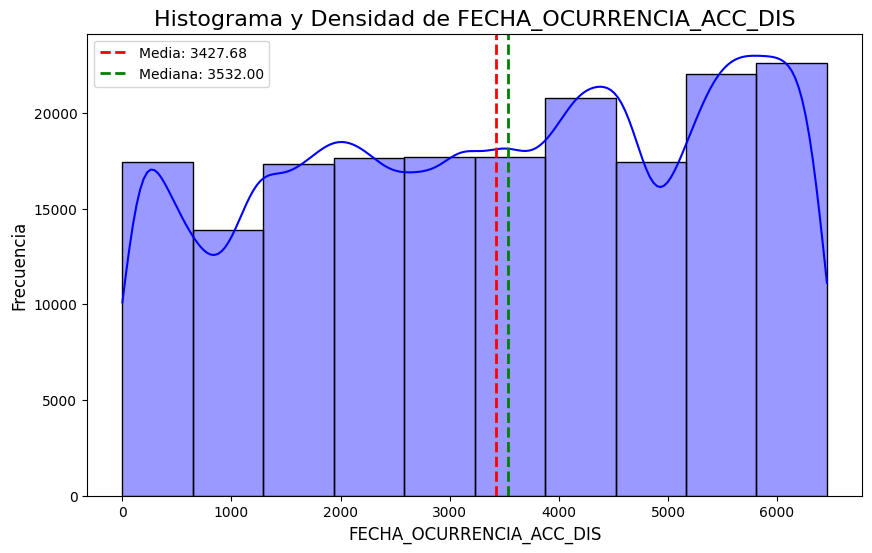

In [ ]:
asimetria = dataframe['FECHA_OCURRENCIA_ACC_DIS'].skew()
print(f'Asimetría: {asimetria}')

# Calcular la curtosis
curtosis = dataframe['GRAVEDAD'].kurt()
print(f'Curtosis: {curtosis}')

# Graficar el histograma y la línea de densidad
plt.figure(figsize=(10, 6))

# Histograma y línea de densidad (KDE)
sns.histplot(dataframe['FECHA_OCURRENCIA_ACC_DIS'], kde=True, bins=10, color='blue', alpha=0.4)

# Título y etiquetas
plt.title('Histograma y Densidad de FECHA_OCURRENCIA_ACC_DIS', fontsize=16)
plt.xlabel('FECHA_OCURRENCIA_ACC_DIS', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Añadir líneas de la media y la mediana
media = dataframe['FECHA_OCURRENCIA_ACC_DIS'].mean()
mediana = dataframe['FECHA_OCURRENCIA_ACC_DIS'].median()

plt.axvline(media, color='red', linestyle='dashed', linewidth=2, label=f'Media: {media:.2f}')
plt.axvline(mediana, color='green', linestyle='dashed', linewidth=2, label=f'Mediana: {mediana:.2f}')

# Añadir la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

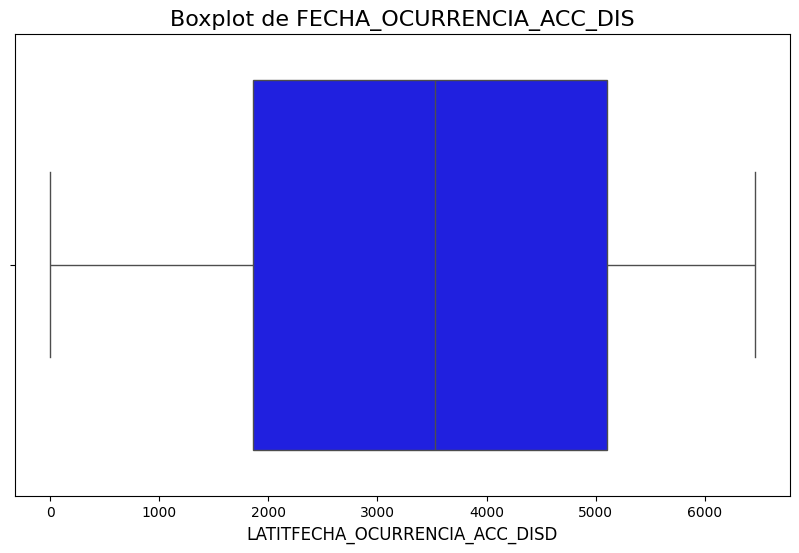

In [ ]:
# Graficar el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=dataframe['FECHA_OCURRENCIA_ACC_DIS'], color='blue')

# Título y etiquetas
plt.title('Boxplot de FECHA_OCURRENCIA_ACC_DIS', fontsize=16)
plt.xlabel('LATITFECHA_OCURRENCIA_ACC_DISD', fontsize=12)

# Mostrar el gráfico
plt.show()

Asimetría: 0.15566805981969845
Curtosis: 17.697160947043077


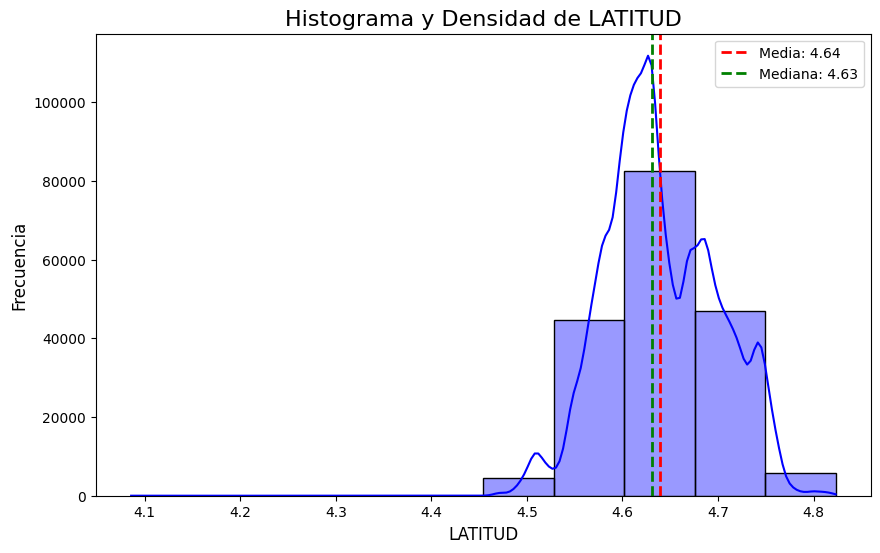

In [ ]:
asimetria = dataframe['LATITUD'].skew()
print(f'Asimetría: {asimetria}')

# Calcular la curtosis
curtosis = dataframe['GRAVEDAD'].kurt()
print(f'Curtosis: {curtosis}')

# Graficar el histograma y la línea de densidad
plt.figure(figsize=(10, 6))

# Histograma y línea de densidad (KDE)
sns.histplot(dataframe['LATITUD'], kde=True, bins=10, color='blue', alpha=0.4)

# Título y etiquetas
plt.title('Histograma y Densidad de LATITUD', fontsize=16)
plt.xlabel('LATITUD', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Añadir líneas de la media y la mediana
media = dataframe['LATITUD'].mean()
mediana = dataframe['LATITUD'].median()

plt.axvline(media, color='red', linestyle='dashed', linewidth=2, label=f'Media: {media:.2f}')
plt.axvline(mediana, color='green', linestyle='dashed', linewidth=2, label=f'Mediana: {mediana:.2f}')

# Añadir la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

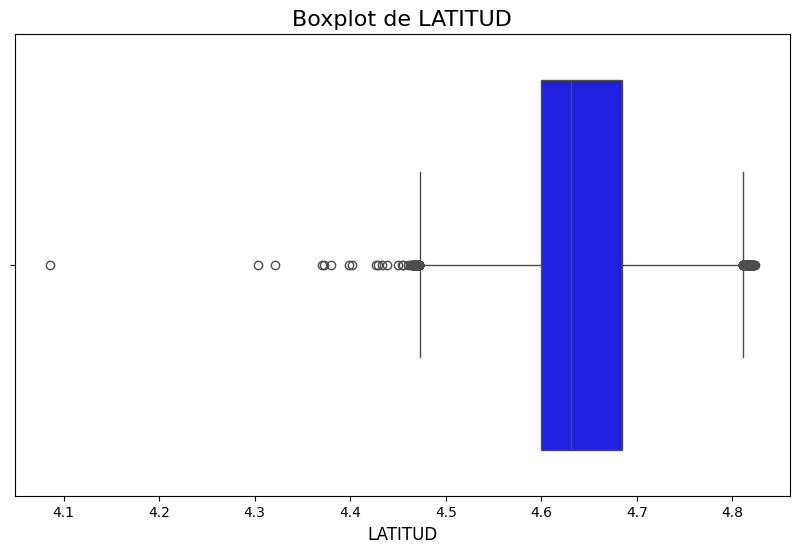

In [ ]:
# Graficar el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=dataframe['LATITUD'], color='blue')

# Título y etiquetas
plt.title('Boxplot de LATITUD', fontsize=16)
plt.xlabel('LATITUD', fontsize=12)

# Mostrar el gráfico
plt.show()

Asimetría: -0.11909167429115493
Curtosis: 17.697160947043077


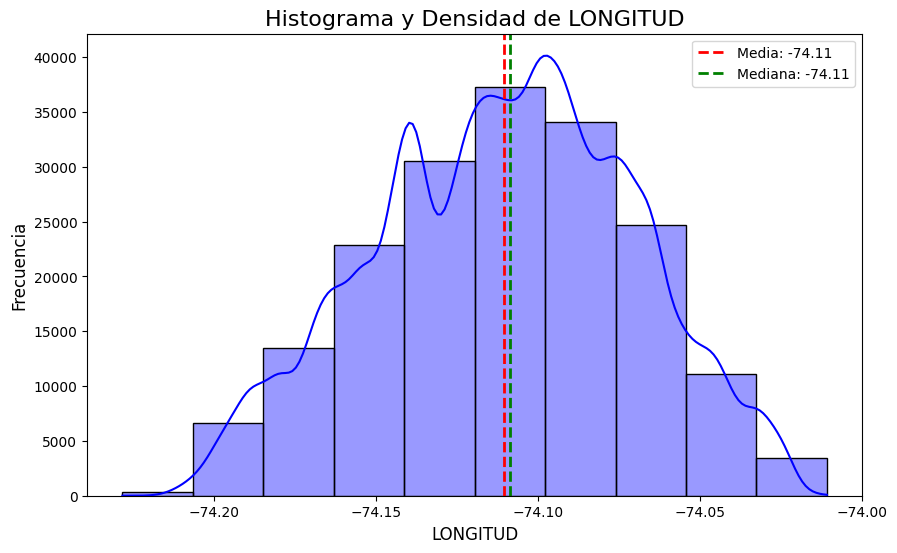

In [ ]:
asimetria = dataframe['LONGITUD'].skew()
print(f'Asimetría: {asimetria}')

# Calcular la curtosis
curtosis = dataframe['GRAVEDAD'].kurt()
print(f'Curtosis: {curtosis}')

# Graficar el histograma y la línea de densidad
plt.figure(figsize=(10, 6))

# Histograma y línea de densidad (KDE)
sns.histplot(dataframe['LONGITUD'], kde=True, bins=10, color='blue', alpha=0.4)

# Título y etiquetas
plt.title('Histograma y Densidad de LONGITUD', fontsize=16)
plt.xlabel('LONGITUD', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Añadir líneas de la media y la mediana
media = dataframe['LONGITUD'].mean()
mediana = dataframe['LONGITUD'].median()

plt.axvline(media, color='red', linestyle='dashed', linewidth=2, label=f'Media: {media:.2f}')
plt.axvline(mediana, color='green', linestyle='dashed', linewidth=2, label=f'Mediana: {mediana:.2f}')

# Añadir la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

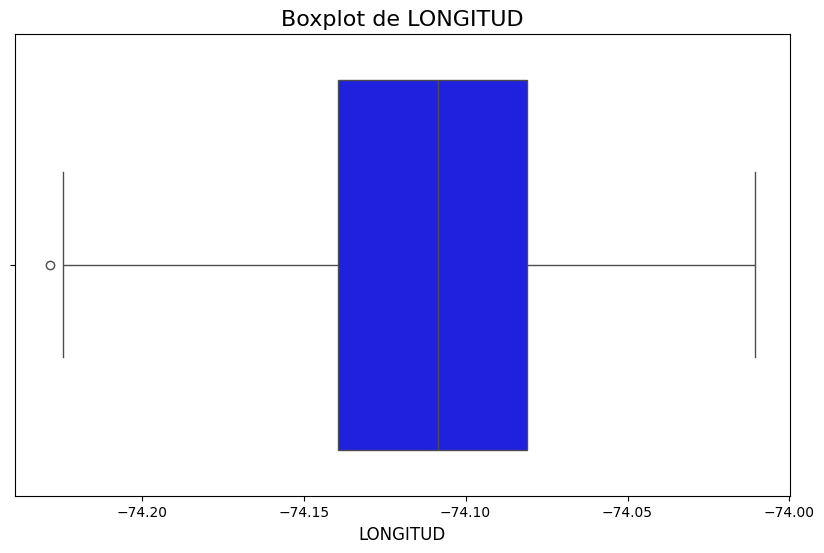

In [ ]:
# Graficar el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=dataframe['LONGITUD'], color='blue')

# Título y etiquetas
plt.title('Boxplot de LONGITUD', fontsize=16)
plt.xlabel('LONGITUD', fontsize=12)

# Mostrar el gráfico
plt.show()

Asimetría: 4.4381267552357455
Curtosis: 17.697160947043077


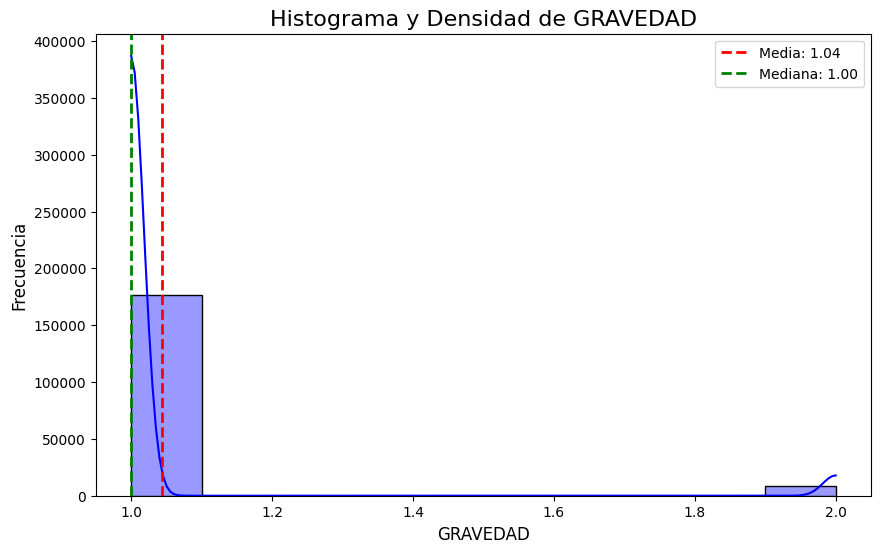

In [ ]:
asimetria = dataframe['GRAVEDAD'].skew()
print(f'Asimetría: {asimetria}')

# Calcular la curtosis
curtosis = dataframe['GRAVEDAD'].kurt()
print(f'Curtosis: {curtosis}')

# Graficar el histograma y la línea de densidad
plt.figure(figsize=(10, 6))

# Histograma y línea de densidad (KDE)
sns.histplot(dataframe['GRAVEDAD'], kde=True, bins=10, color='blue', alpha=0.4)

# Título y etiquetas
plt.title('Histograma y Densidad de GRAVEDAD', fontsize=16)
plt.xlabel('GRAVEDAD', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Añadir líneas de la media y la mediana
media = dataframe['GRAVEDAD'].mean()
mediana = dataframe['GRAVEDAD'].median()

plt.axvline(media, color='red', linestyle='dashed', linewidth=2, label=f'Media: {media:.2f}')
plt.axvline(mediana, color='green', linestyle='dashed', linewidth=2, label=f'Mediana: {mediana:.2f}')

# Añadir la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

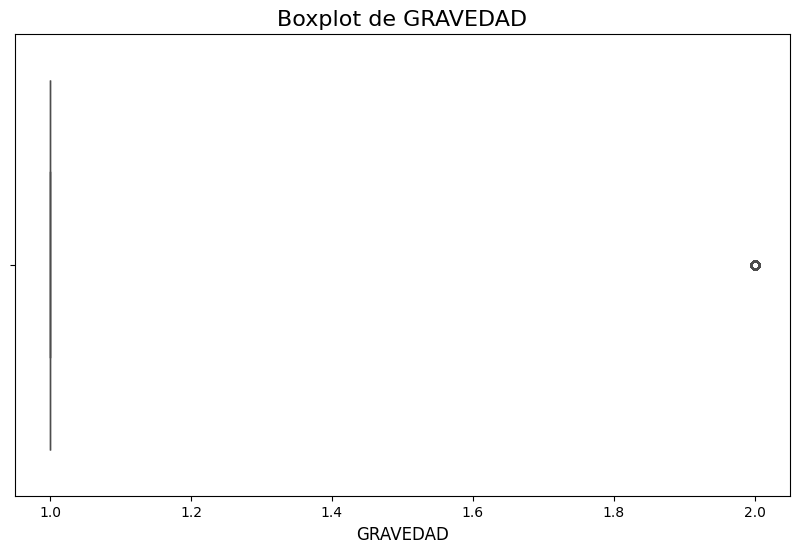

In [ ]:
# Graficar el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=dataframe['GRAVEDAD'], color='blue')

# Título y etiquetas
plt.title('Boxplot de GRAVEDAD', fontsize=16)
plt.xlabel('GRAVEDAD', fontsize=12)

# Mostrar el gráfico
plt.show()

#####  Diagrma de Dispercion

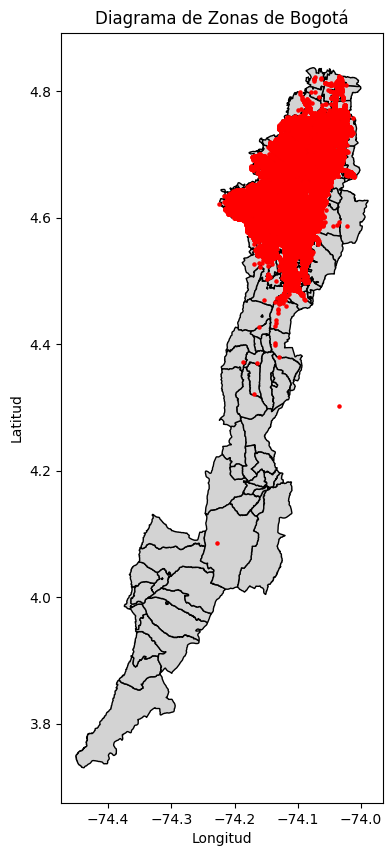

In [ ]:
# Descargar el archivo GeoJSON desde el enlace
url = 'https://gist.githubusercontent.com/john-guerra/ee93225ca2c671b3550d62614f4978f3/raw/b1d556c39f3d7b6e495bf26b7fda815765ac110a/bogota_cadastral.json'
response = requests.get(url)
geojson_data = BytesIO(response.content)

# Cargar el archivo GeoJSON de las zonas de Bogotá
zonas = gpd.read_file(geojson_data)

# Convertir las coordenadas en puntos geoespaciales
puntos = gpd.GeoDataFrame(dataframe, geometry=[Point(lon, lat) for lat, lon in zip(dataframe['LATITUD'], dataframe['LONGITUD'])])

# Graficar las zonas y los puntos
fig, ax = plt.subplots(figsize=(10, 10))
zonas.plot(ax=ax, color='lightgrey', edgecolor='black')
puntos.plot(ax=ax, color='red', markersize=5)

# Configurar el título y las etiquetas
ax.set_title('Diagrama de Zonas de Bogotá')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Mostrar el gráfico
plt.show()

#### Carga

In [ ]:
# Guardar el resultado en un archivo .csv
frecuencia_diaria.to_csv('resultadoSiniestralidad.csv', index=False)

print("El archivo 'resultado.csv' ha sido guardado exitosamente.")

El archivo 'resultado.csv' ha sido guardado exitosamente.
